# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [3]:
df = pd.read_csv('../data/states_edu.csv')
df. head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [4]:
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)
# same renaming scheme as in tutorial since it makes more sense

# drop rows with nan in grade_4 math col (AVG_MATH_4_SCORE)
df.dropna(subset=['AVG_MATH_4_SCORE'], inplace=True)
# filling in missing 'ENROLL_ALL' with 'ENROLL_ALL_EST' due to the analysis done in tutorial 1
df["ENROLL_ALL_EST"] = df["ENROLL_ALL_EST"].fillna(df["ENROLL_ALL"])
df.head()
# Maybe need to clean up rows with nan if needed later

,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,ENROLL_4,ENROLL_8,ENROLL_12,ENROLL_PRIMARY,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,731634.0,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
2,1992_ARIZONA,ARIZONA,1992,673477.0,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,441490.0,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,5254844.0,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN
5,1992_COLORADO,COLORADO,1992,612635.0,3185173.0,163253.0,1307986.0,1713934.0,3264826.0,1642466.0,...,50648.0,45025.0,34533.0,NaN,NaN,612635.0,221.0,272.0,217.0,NaN


<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: Grade 4 math

How many years of data are logged in our dataset? 

In [5]:
print("There are " + str(df["YEAR"].nunique()) + "years of data logged in our dataset")

There are 13years of data logged in our dataset


Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [6]:
state_group = df.groupby(["STATE"])
state_mean = state_group["AVG_MATH_4_SCORE"].mean()
state_mean
diff_mich_ohio_mean = state_mean.loc['MICHIGAN'] - state_mean.loc['OHIO']
if diff_mich_ohio_mean > 0:
    print("Michigan has the higher average outcomes score across all years.")
else:
    print("Ohio has the higher average outcomes score across all years.")
# print(state_mean.loc["MICHIGAN"])
# print(state_mean.loc["OHIO"])
state_group

Ohio has the higher average outcomes score across all years.


Find the average for your outcome score across all states in 2019

In [7]:
year_group = df.groupby(["YEAR"])
year_mean = year_group["AVG_MATH_4_SCORE"].mean()
year_mean
print("Average outcome score of Grade 4 math across all state in 2019 is " + str(year_mean.loc[2019]))

Average outcome score of Grade 4 math across all state in 2019 is 239.9433962264151


Find the maximum outcome score for every state. 

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [8]:
df.groupby(['STATE'], sort=False)['AVG_MATH_4_SCORE'].max()

STATE
ALABAMA                 233.0
ARIZONA                 240.0
ARKANSAS                240.0
CALIFORNIA              235.0
COLORADO                247.0
CONNECTICUT             245.0
DELAWARE                243.0
DISTRICT_OF_COLUMBIA    235.0
FLORIDA                 246.0
GEORGIA                 240.0
HAWAII                  243.0
IDAHO                   242.0
INDIANA                 249.0
IOWA                    246.0
KENTUCKY                242.0
LOUISIANA               234.0
MAINE                   246.0
MARYLAND                247.0
MASSACHUSETTS           253.0
MICHIGAN                238.0
MINNESOTA               253.0
MISSISSIPPI             241.0
MISSOURI                241.0
NEBRASKA                246.0
NEW_HAMPSHIRE           253.0
NEW_JERSEY              249.0
NEW_MEXICO              233.0
NEW_YORK                243.0
NORTH_CAROLINA          245.0
NORTH_DAKOTA            246.0
OHIO                    246.0
OKLAHOMA                240.0
PENNSYLVANIA            246.0
RHOD

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [9]:
# First feature, instruction expenditure per 4th grade enrolled student.
    # Justification: The response variable is average score of 4th grade math, and the expenditure per student seem to correlate with that
df["INSTRUCTION_EXPENDITURE_PER_4TH_GRADER"] = df["INSTRUCTION_EXPENDITURE"] / df["ENROLL_4"]
# Second feature, total revenue divided by number of enrollment.
df["REVENUE_PER_STUDENT"] = df["TOTAL_REVENUE"] / df["ENROLL_ALL"]
    # Justification: Usually, area with higher level of economic development has better educational environment. Revenue per capita is a
    # great measure of that; since we don't have population in the chart, we would use number of enrolled students, since vast majority of
    # children go to 4th grade, and therefore proportional to the total population in general.
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,ENROLL_12,ENROLL_PRIMARY,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,INSTRUCTION_EXPENDITURE_PER_4TH_GRADER,REVENUE_PER_STUDENT
0,1992_ALABAMA,ALABAMA,1992,731634.0,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN,25.569528,3.661510
2,1992_ARIZONA,ARIZONA,1992,673477.0,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN,25.903487,4.837699
3,1992_ARKANSAS,ARKANSAS,1992,441490.0,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN,27.844854,3.877685
4,1992_CALIFORNIA,CALIFORNIA,1992,5254844.0,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN,34.317171,4.997299
5,1992_COLORADO,COLORADO,1992,612635.0,3185173.0,163253.0,1307986.0,1713934.0,3264826.0,1642466.0,...,34533.0,NaN,NaN,612635.0,221.0,272.0,217.0,NaN,32.429040,5.199137


Feature engineering justification: **<BRIEFLY DESCRIBE WHY YOU MADE THE CHANGES THAT YOU DID\>**

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

Text(0, 0.5, '4th Grade Math Score')

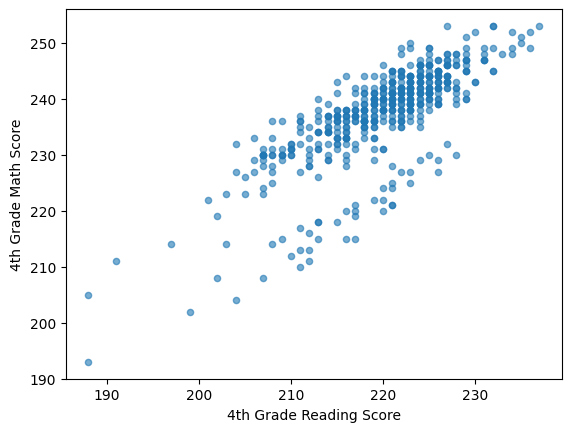

In [10]:
# relationship between 4th grade reading score and 4th grade math score
df.plot.scatter(x='AVG_READING_4_SCORE', y='AVG_MATH_4_SCORE', alpha=0.6)
plt.xlabel('4th Grade Reading Score')
plt.ylabel('4th Grade Math Score')

**<CAPTION FOR VIZ 1>**

**Visualization 2**

Text(0, 0.5, '4th Grade Math Score')

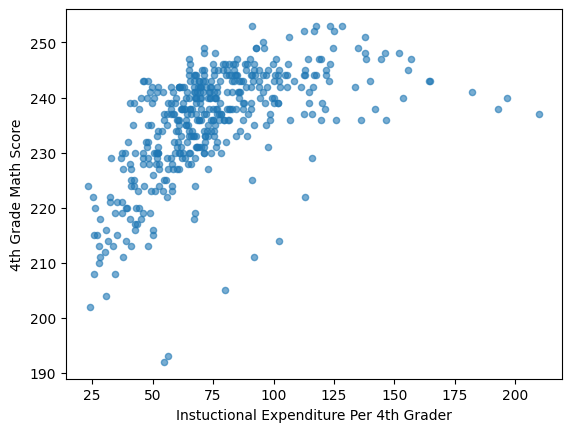

In [11]:
# relationship between instruction expenditure per 4th grade student and 4th grade math score
df.plot.scatter(x='INSTRUCTION_EXPENDITURE_PER_4TH_GRADER', y='AVG_MATH_4_SCORE', alpha=0.6)
plt.xlabel('Instuctional Expenditure Per 4th Grader')
plt.ylabel('4th Grade Math Score')

**<CAPTION FOR VIZ 2>**

Text(0, 0.5, '4th Grade Math Score')

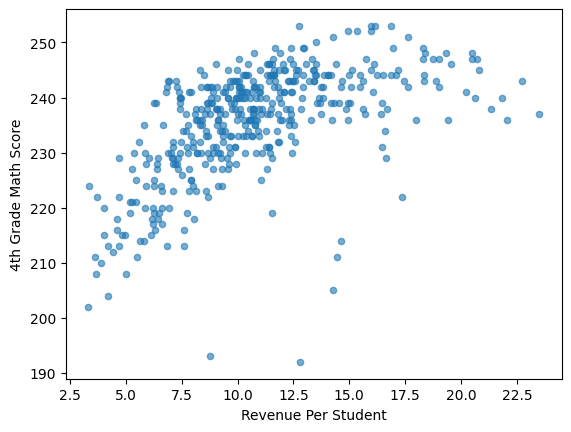

In [12]:
# relationship between revenue per student and 4th grade math score
df.plot.scatter(x='REVENUE_PER_STUDENT', y='AVG_MATH_4_SCORE', alpha=0.6)
plt.xlabel('Revenue Per Student')
plt.ylabel('4th Grade Math Score')

Text(0, 0.5, '4th Grade Math Score')

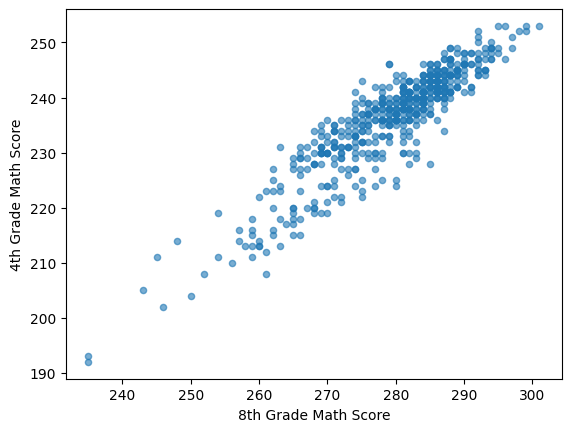

In [13]:
# relationship between 8th grade math score and 4th grade math score
df.plot.scatter(x='AVG_MATH_8_SCORE', y='AVG_MATH_4_SCORE', alpha=0.6)
plt.xlabel('8th Grade Math Score')
plt.ylabel('4th Grade Math Score')

Text(0, 0.5, '4th Grade Math Score')

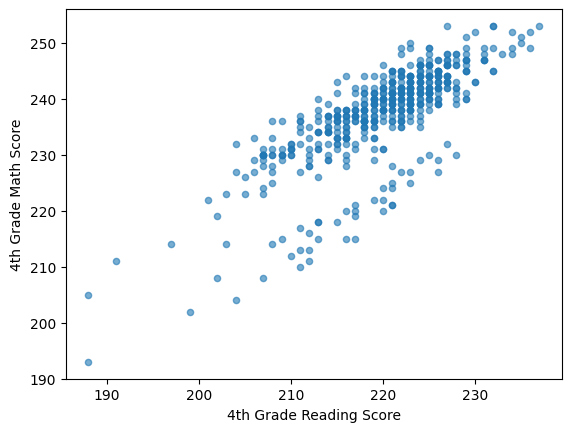

In [14]:
# relationship between 4th grade reading score and 4th grade math score
df.plot.scatter(x='AVG_READING_4_SCORE', y='AVG_MATH_4_SCORE', alpha=0.6)
plt.xlabel('4th Grade Reading Score')
plt.ylabel('4th Grade Math Score')

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [15]:
from sklearn.model_selection import train_test_split

In [47]:
# X is input data, y is response data
X = df[['INSTRUCTION_EXPENDITURE_PER_4TH_GRADER', 'REVENUE_PER_STUDENT', 'AVG_MATH_8_SCORE', 'AVG_READING_4_SCORE']].dropna()
y = df.loc[X.index]['AVG_MATH_4_SCORE'] 
y.fillna(y.median(), inplace=True)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [49]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [50]:
model = LinearRegression()

In [51]:
model.fit(X_train, y_train)

LinearRegression()

In [52]:
print(model.intercept_)
print(model.coef_)

6.8237552947964275
[-0.06124237  0.78651031  0.80612991  0.00352855]


## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [53]:
model.score(X_test, y_test)

0.8846427948719795

In [59]:
# mean error
np.mean(model.predict(X_test)-y_test)

0.14406762027841655

In [60]:
# mean absolute error
np.mean(np.abs(model.predict(X_test)-y_test))

2.7098483509645392

In [61]:
# root mean squared error -- penalizes large errors
np.mean((model.predict(X_test)-y_test)**2)**0.5

3.412423909868725

We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

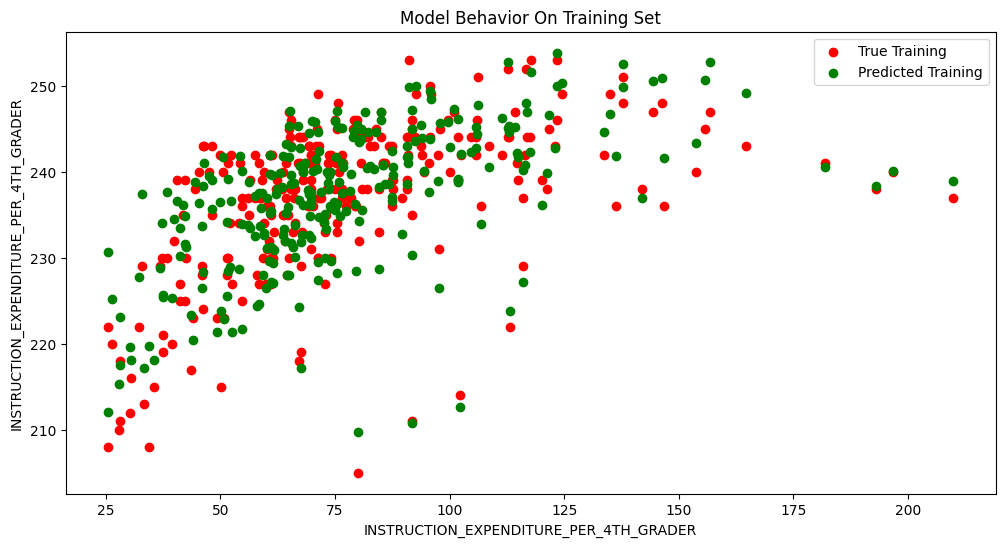

In [55]:
# 'INSTRUCTION_EXPENDITURE_PER_4TH_GRADER', 'REVENUE_PER_STUDENT', 'AVG_MATH_8_SCORE', 'AVG_READING_4_SCORE'
col_name = 'INSTRUCTION_EXPENDITURE_PER_4TH_GRADER'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('AVG_MATH_4_SCORE')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior On Training Set')

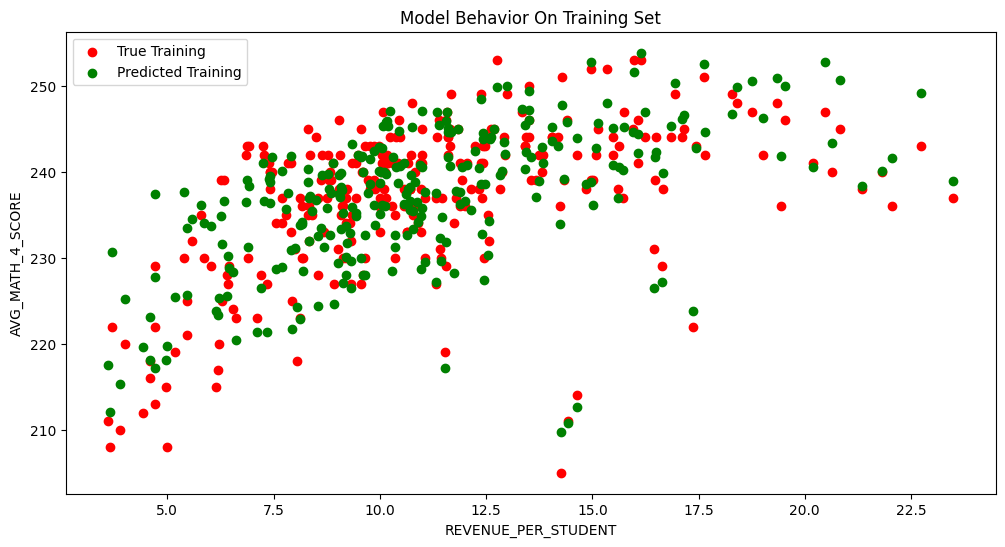

In [56]:
col_name = 'REVENUE_PER_STUDENT'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('AVG_MATH_4_SCORE')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior On Training Set')

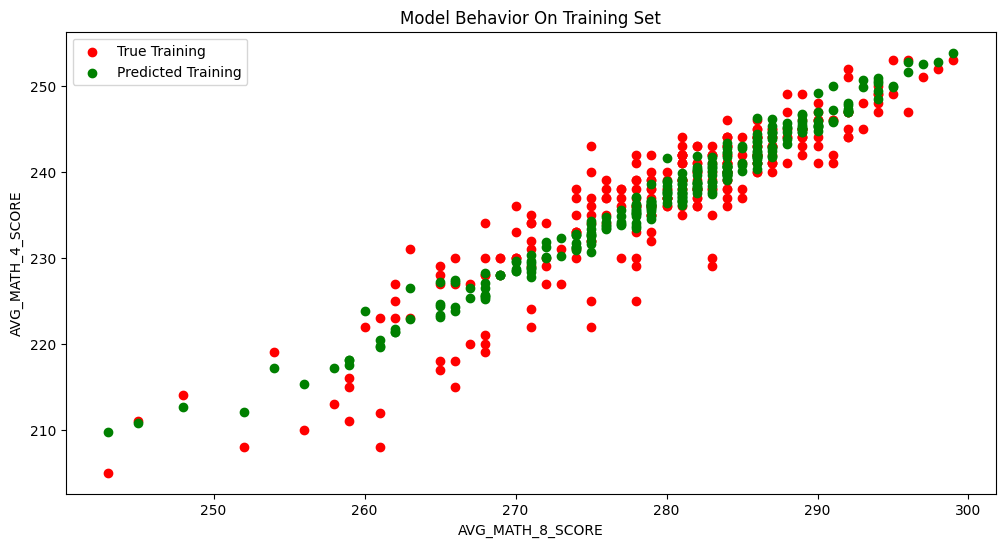

In [57]:
col_name = 'AVG_MATH_8_SCORE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('AVG_MATH_4_SCORE')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior On Training Set')

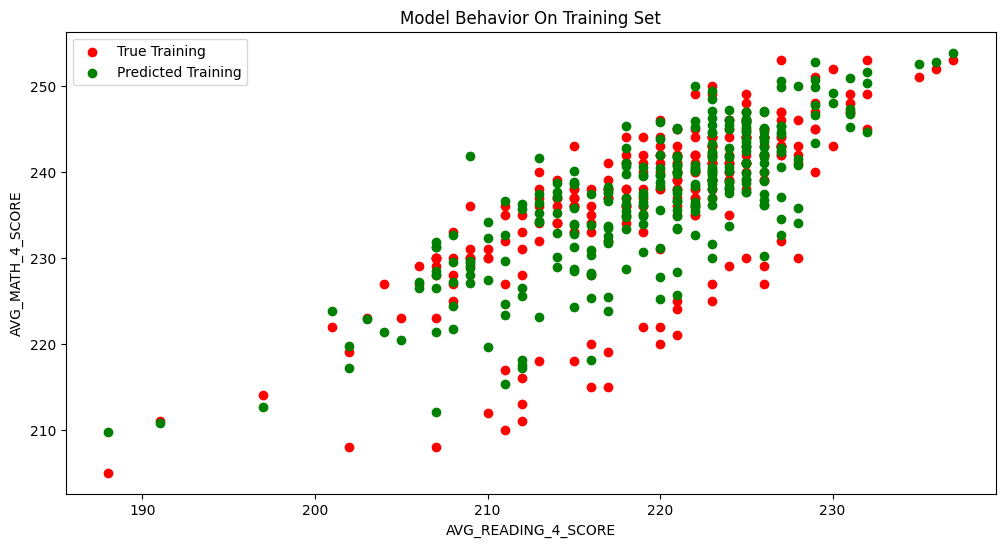

In [58]:
col_name = 'AVG_READING_4_SCORE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('AVG_MATH_4_SCORE')
plt.title("Model Behavior On Training Set")

<h2> Summary </h2>

**<WRITE A PARAGRAPH SUMMARIZING YOUR WORK, FINDINGS, AND THE PERFORMANCE OF YOUR MODEL\>**